# Exploration of Google Removal Requests

## 1. Setup & Sources

- Google Data is [here](https://www.google.com/transparencyreport/removals/copyright/data/).

- I'm using [this site](http://research.domaintools.com/statistics/tld-counts/) to scrap the amout of Top Level occurrences and creat a .csv with the most recent approximation of top level domains.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import requests
from bs4 import BeautifulSoup
import datetime as dt

In [7]:
df_domains = pd.read_csv("data/domains.csv") #, nrows=100000
df_TL_domains = pd.read_csv("data/160812_Top_Level_Domains.csv")
df_TL_countries = pd.read_csv("data/TL_DOMAINS_All_COUNTRIES.csv")

In [8]:
df_requests = pd.read_csv("data/requests.csv")# nrows=100000

## 2. Looking into how many links were removed by Level Domain

In [9]:
#Function to create the Domain TL 

#Call the first element of the list works fine in the Test version. But as soon as you 
#you work with the large data set it creates error messages. To work aroung them I 
#transfered the func output into a tuple. Somewhere along the line there is a corrupt 
#cell. How can I find it?

import re
def toplevel_domains(xx):
    if xx == 'unknown':
        return
    try:
        return re.findall(r'\.[a-z][a-z]+$', xx)[0] #tuple
    except:
        return None

df_domains['Domain TL'] = df_domains['Domain'].apply(toplevel_domains)

df_domains.head()

In [10]:
#Now I want to count the number of URLs that were removed and group them by Domain TL.
df_domains_removed_Count = pd.DataFrame(df_domains.groupby('Domain TL')['URLs removed'].sum().sort_values(ascending=False))
df_domains_removed_Count = df_domains_removed_Count.reset_index()

In [11]:
df_domains_removed_Count.head(1)

,Domain TL,URLs removed
0,.com,558251640


In [12]:
df_TL_domains.head(1)

,Unnamed: 0,index,name,count
0,0,1,.com,127307675


In [13]:
df_TL_countries.head(1)

,Unnamed: 0,Domain,Sponsor,Type,Country Name
0,0,.aaa,"American Automobile Association, Inc.",generic,NaN


In [14]:
#Merging the "Removed URL Count" with the "Top Level Domain Count by country" 
#and the "TL Domain types and country.
df = df_TL_domains.merge(df_domains_removed_Count, left_on='name', right_on='Domain TL')
df = df.merge(df_TL_countries, left_on='name', right_on='Domain')

In [15]:
del df['Unnamed: 0_x']
del df['name']
del df['Unnamed: 0_y']
del df['index']
del df['Domain']

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 479
Data columns (total 6 columns):
count           480 non-null int64
Domain TL       480 non-null object
URLs removed    480 non-null int64
Sponsor         480 non-null object
Type            480 non-null object
Country Name    223 non-null object
dtypes: int64(2), object(4)
memory usage: 26.2+ KB


In [17]:
df['removed URLs per TLD'] = df['URLs removed'] / df['count']

In [18]:
df['removed URLs per TLD'] = df['removed URLs per TLD'].astype(float)

In [19]:
df.sort_values(by='removed URLs per TLD', ascending=False).head(5)

,count,Domain TL,URLs removed,Sponsor,Type,Country Name,removed URLs per TLD
475,10,.arpa,173427,Internet Architecture Board (IAB),generic,NaN,17342.700000
359,4213,.sx,8351342,SX Registry SA B.V.,country-code,NaN,1982.279136
220,16433,.to,31485942,Government of the Kingdom of Tonga H.R.H. Crow...,country-code,Tonga,1916.019108
427,2267,.wf,3940796,Association Française pour le Nommage Internet...,country-code,Wallis and Futuna,1738.330834
399,3003,.tf,3981314,Association Française pour le Nommage Internet...,country-code,French Southern and Antarctic Lands,1325.778888


In [20]:
df_countries = df[df['Type'] == 'country-code']

In [21]:
df_countries.sort_values(by='removed URLs per TLD', ascending=False)

,count,Domain TL,URLs removed,Sponsor,Type,Country Name,removed URLs per TLD
359,4213,.sx,8351342,SX Registry SA B.V.,country-code,NaN,1982.279136
220,16433,.to,31485942,Government of the Kingdom of Tonga H.R.H. Crow...,country-code,Tonga,1916.019108
427,2267,.wf,3940796,Association Française pour le Nommage Internet...,country-code,Wallis and Futuna,1738.330834
399,3003,.tf,3981314,Association Française pour le Nommage Internet...,country-code,French Southern and Antarctic Lands,1325.778888
416,2604,.cd,2743594,Office Congolais des Postes et Télécommunicati...,country-code,Democratic Republic of the Congo,1053.607527
365,3972,.yt,3497759,Association Française pour le Nommage Internet...,country-code,Mayotte,880.603978
302,7140,.pm,4990039,Association Française pour le Nommage Internet...,country-code,Saint-Pierre and Miquelon,698.885014
370,3788,.gy,2198029,University of Guyana,country-code,Guyana,580.261088
388,3243,.gd,1608719,The National Telecommunications Regulatory Com...,country-code,Grenada,496.058896
229,15576,.so,5505645,Ministry of Post and Telecommunications,country-code,Somalia,353.469761


In [22]:
df_countries.to_csv('Removed_URLs_by_Country.csv')

# Working out links removed by Top Level Domain distribution 

In [23]:
# .com
# .net
# Country Codes
# Rest

In [24]:
df.head()

,count,Domain TL,URLs removed,Sponsor,Type,Country Name,removed URLs per TLD
0,127307675,.com,558251640,VeriSign Global Registry Services,generic,NaN,4.385059
1,23031390,.tk,8908939,Telecommunication Tokelau Corporation (Teletok),country-code,Tokelau,0.386817
2,15748660,.net,189780374,VeriSign Global Registry Services,generic,NaN,12.050573
3,14278619,.de,2363832,DENIC eG,country-code,Germany,0.165550
4,10915445,.org,88859720,Public Interest Registry (PIR),generic,NaN,8.140733


In [25]:
#Total first:
Total = df['URLs removed'].sum()

In [26]:
#How may links where .com links?
com_sum = df[df['Domain TL'] == '.com']['URLs removed'].sum()

In [27]:
#How may links where .com links?
net_sum = df[df['Domain TL'] == '.net']['URLs removed'].sum()

In [28]:
TLcountry_sum = df_countries['URLs removed'].sum()

In [29]:
Rest = Total - com_sum - net_sum - TLcountry_sum

In [30]:
#Creating a dictionary with these values

In [31]:
Pie_dict = [{'type': '.com', 'Count': com_sum}, {'type': '.net', 'Count': net_sum}, {'type': 'Other Generic', \
            'Count': Rest}, {'type': 'Country Domains', 'Count': TLcountry_sum}] 

In [32]:
TL_cat = pd.DataFrame(Pie_dict)

In [33]:
#Creasting Percentage column
TL_cat['Percent'] = round(TL_cat['Count'] / TL_cat['Count'].sum() * 100)

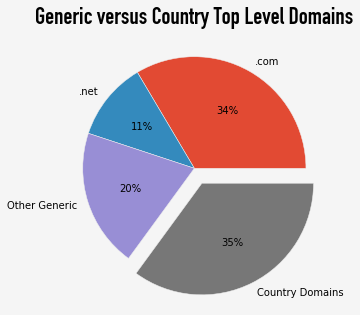

In [34]:
fig, ax = plt.subplots(figsize =(5,5), facecolor='WhiteSmoke')
explode = (0, 0, 0, 0.15)
labels = TL_cat['type']

TL_cat.plot(kind='pie', y='Count', ax=ax, explode=explode, autopct='%1.f%%', labels=labels, legend=False)
ax.set_ylabel("")
ax.set_title("Generic versus Country Top Level Domains", fontname='DIN Condensed', fontsize=24)
plt.savefig('TL_pie.pdf', transparent=True, bbox_inches='tight')

# Domains that are mentioned the most 

In [35]:
df_domains['Domain'].value_counts().head(10)

uploaded.net           392722
zippyshare.com         338773
4shared.com            321106
torrentz.eu            319052
rapidgator.net         309591
torrenthound.com       303052
bitsnoop.com           244355
torrentdownloads.me    236128
monova.org             227104
thepiratebay.se        226828
Name: Domain, dtype: int64

In [36]:
companies = df_domains['Domain'].value_counts().head(10)

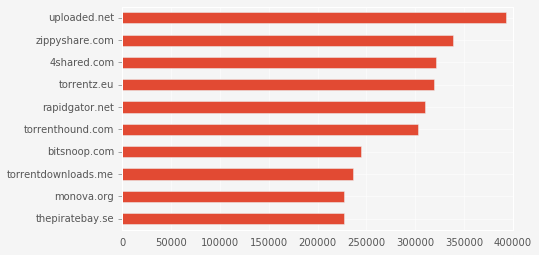

In [37]:
fig, ax = plt.subplots(figsize =(7,4), facecolor='WhiteSmoke')
companies.sort_values().plot(kind='barh')

ax.set_ylabel(ylabel='')
ax.set_xlabel(xlabel='')
ax.set_axis_bgcolor("WhiteSmoke")

plt.tick_params(
    #axis='x',
    top='off',
    which='major',
    left='on',
    right='off',
    bottom='off',
    labeltop='off',
    labelbottom='on',
    labelright='off',
    labelleft='on')

plt.savefig('companies_bar.pdf', transparent=True, bbox_inches='tight')

# Plotting the removals over time

In [38]:
df_requests.head(1)

,Request ID,Date,Lumen URL,Copyright owner ID,Copyright owner name,Reporting organization ID,Reporting organization name,URLs removed,URLs for which we took no action,URLs pending review,From Abuser
0,3058815,2016-01-26T11:06:03Z,http://lumendatabase.org/notices/11759011,54113,Thieme Publishers Stuttgart,9911,Link-Busters.com,29,6,0,False


In [39]:
dt.datetime.strptime('07/06/2015 10:58:27 AM', '%m/%d/%Y %I:%M:%S %p')
#datetime.datetime(2015, 7, 6, 0, 0)
parser = lambda date: pd.datetime.strptime(date, '%m/%d/%Y %H:%M:%S')

In [40]:
df_requests = pd.read_csv("data/requests.csv", low_memory=False, parse_dates=[1], dtype=str)

In [41]:
df_requests.index = df['Date']

KeyError: 'Date'

In [ ]:
fig, ax = plt.subplots(figsize=(10,4), facecolor='WhiteSmoke')
df.resample('M')['Request ID'].count().plot(y='URLs removed')
ax.set_ylabel(ylabel='')
ax.set_xlabel(xlabel='')
ax.set_axis_bgcolor("WhiteSmoke")

plt.tick_params(
    #axis='x',
    top='off',
    which='major',
    left='on',
    right='off',
    bottom='off',
    labeltop='off',
    labelbottom='on',
    labelright='on',
    labelleft='off')
plt.savefig('time_plot.pdf', transparent=True, bbox_inches='tight')

In [44]:
df_domains[df_domains['Domain TL'] == '.ch']['URLS removed'].values_count()

KeyError: 'URLS removed'

In [45]:
df_countries.head()

,count,Domain TL,URLs removed,Sponsor,Type,Country Name,removed URLs per TLD
1,23031390,.tk,8908939,Telecommunication Tokelau Corporation (Teletok),country-code,Tokelau,0.386817
3,14278619,.de,2363832,DENIC eG,country-code,Germany,0.165550
5,10523005,.cn,282770,China Internet Network Information Center (CNNIC),country-code,People’s Republic of China,0.026872
6,10237444,.uk,11218214,Nominet UK,country-code,United Kingdom,1.095802
9,5039815,.ru,15050144,Coordination Center for TLD RU,country-code,NaN,2.986249


In [46]:
df_countries[df_countries['Country Name'] == 'Switzerland']

,count,Domain TL,URLs removed,Sponsor,Type,Country Name,removed URLs per TLD
25,1634062,.ch,9324724,SWITCH The Swiss Education & Research Network,country-code,Switzerland,5.706469


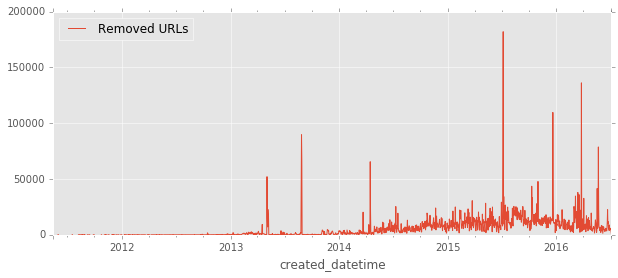

In [63]:
ch_df_with_dates.resample('D').sum().plot(y='URLs removed_x', label='Removed URLs', figsize=(10,4))

In [73]:
ch_df_with_dates

,Request ID,Domain,URLs removed_x,URLs for which we took no action_x,URLs pending review_x,From Abuser_x,Top Level Domains,Date,Lumen URL,Copyright owner ID,Copyright owner name,Reporting organization ID,Reporting organization name,URLs removed_y,URLs for which we took no action_y,URLs pending review_y,From Abuser_y,created_datetime
created_datetime,,,,,,,,,,,,,,,,,,
2015-07-11 16:46:37+00:00,2371786,flyeder.ch,1,0,0,False,.ch,2015-07-11T16:46:37Z,http://www.chillingeffects.org/notices/10955942,78025,"La Femme Boutique, Inc.",51966,Counterfeit.Technology,30,0,0,False,2015-07-11 16:46:37+00:00
2014-02-06 06:08:53+00:00,1005667,mp3skull.ch,6,0,0,False,.ch,2014-02-06T06:08:53Z,http://www.chillingeffects.org/notice.cgi?sID=...,48178,Beatport,11836,AudioLock.NET,25,6,0,False,2014-02-06 06:08:53+00:00
2015-07-31 20:06:37+00:00,2437029,uploadable.ch,1,0,0,False,.ch,2015-07-31T20:06:37Z,http://www.chillingeffects.org/notices/11026493,152314,Takeover Music,121710,proMedia,10,1,0,False,2015-07-31 20:06:37+00:00
2016-05-24 14:22:23+00:00,3488523,torrentz.ch,1,0,0,False,.ch,2016-05-24T14:22:23Z,https://lumendatabase.org/notices/12319862,26068,"Home Box Office, Inc.",17947,IP-Echelon Pty Ltd,374,2,0,False,2016-05-24 14:22:23+00:00
2015-11-04 12:42:05+00:00,2771558,kickass-torrents.ch,2,0,0,False,.ch,2015-11-04T12:42:05Z,http://lumendatabase.org/notices/11438882,157343,The Beggars Group,7801,MUSO.com Anti-piracy,920,45,0,False,2015-11-04 12:42:05+00:00
2015-12-21 23:11:17+00:00,2935156,nowdownload.ch,10,0,0,False,.ch,2015-12-21T23:11:17Z,http://lumendatabase.org/notices/11630648,56054,"Disney Enterprises, Inc.",7667,Walt Disney Company,7388,529,0,False,2015-12-21 23:11:17+00:00
2015-12-21 23:11:17+00:00,2935156,nowvideo.ch,15,0,0,False,.ch,2015-12-21T23:11:17Z,http://lumendatabase.org/notices/11630648,56054,"Disney Enterprises, Inc.",7667,Walt Disney Company,7388,529,0,False,2015-12-21 23:11:17+00:00
2015-12-21 23:11:17+00:00,2935156,uploadable.ch,56,0,0,False,.ch,2015-12-21T23:11:17Z,http://lumendatabase.org/notices/11630648,56054,"Disney Enterprises, Inc.",7667,Walt Disney Company,7388,529,0,False,2015-12-21 23:11:17+00:00
2015-08-27 09:09:16+00:00,2528578,uploadable.ch,1,0,0,False,.ch,2015-08-27T09:09:16Z,http://www.chillingeffects.org/notices/11140631,44120,Berrett-Koehler Publishers,28460,Digimarc,9,0,0,False,2015-08-27 09:09:16+00:00


In [78]:
uploadablech_df = ch_df_with_dates[ch_df_with_dates['Domain'] == 'uploadable.ch']

In [79]:
uploadablech_df

,Request ID,Domain,URLs removed_x,URLs for which we took no action_x,URLs pending review_x,From Abuser_x,Top Level Domains,Date,Lumen URL,Copyright owner ID,Copyright owner name,Reporting organization ID,Reporting organization name,URLs removed_y,URLs for which we took no action_y,URLs pending review_y,From Abuser_y,created_datetime
created_datetime,,,,,,,,,,,,,,,,,,
2015-07-31 20:06:37+00:00,2437029,uploadable.ch,1,0,0,False,.ch,2015-07-31T20:06:37Z,http://www.chillingeffects.org/notices/11026493,152314,Takeover Music,121710,proMedia,10,1,0,False,2015-07-31 20:06:37+00:00
2015-12-21 23:11:17+00:00,2935156,uploadable.ch,56,0,0,False,.ch,2015-12-21T23:11:17Z,http://lumendatabase.org/notices/11630648,56054,"Disney Enterprises, Inc.",7667,Walt Disney Company,7388,529,0,False,2015-12-21 23:11:17+00:00
2015-08-27 09:09:16+00:00,2528578,uploadable.ch,1,0,0,False,.ch,2015-08-27T09:09:16Z,http://www.chillingeffects.org/notices/11140631,44120,Berrett-Koehler Publishers,28460,Digimarc,9,0,0,False,2015-08-27 09:09:16+00:00
2014-04-16 18:30:24+00:00,1138448,uploadable.ch,0,119,0,False,.ch,2014-04-16T18:30:24Z,http://www.chillingeffects.org/notice.cgi?sID=...,60681,Hollywood Camera Work,8237,DMCA Force,875,122,0,False,2014-04-16 18:30:24+00:00
2014-04-30 09:04:36+00:00,1166291,uploadable.ch,8,0,0,False,.ch,2014-04-30T09:04:36Z,http://www.chillingeffects.org/notice.cgi?sID=...,55067,MTV Networks s.r.o.,24937,Anti-Piracy Protection,473,170,0,False,2014-04-30 09:04:36+00:00
2015-09-21 19:36:33+00:00,2617603,uploadable.ch,1,0,0,False,.ch,2015-09-21T19:36:33Z,http://www.chillingeffects.org/notices/11226913,56054,"Disney Enterprises, Inc.",7667,Walt Disney Company,10933,262,0,False,2015-09-21 19:36:33+00:00
2016-02-01 19:07:16+00:00,3078657,uploadable.ch,5,0,0,False,.ch,2016-02-01T19:07:16Z,http://lumendatabase.org/notices/11785660,25964,SCPP,42234,rivendell,9503,216,0,False,2016-02-01 19:07:16+00:00
2014-10-22 07:43:07+00:00,1584837,uploadable.ch,39,0,0,False,.ch,2014-10-22T07:43:07Z,http://www.chillingeffects.org/notices/10048387,29089,Summit,199,MarkMonitor AntiPiracy,1013,7,0,False,2014-10-22 07:43:07+00:00
2015-01-16 08:24:01+00:00,1813931,uploadable.ch,10,0,0,False,.ch,2015-01-16T08:24:01Z,http://www.chillingeffects.org/notices/10348848,58549,AMC Film Holdings,199,MarkMonitor AntiPiracy,1627,77,0,False,2015-01-16 08:24:01+00:00


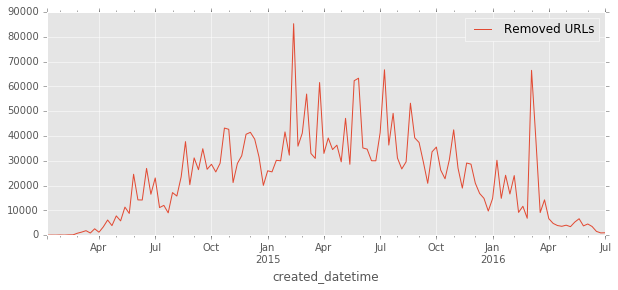

In [81]:
uploadablech_df.resample('W').sum().plot(y='URLs removed_x', label='Removed URLs', figsize=(10,4))

In [70]:
com_df = df[df['Top Level Domains'] == '.com']

KeyboardInterrupt: 

In [67]:
com = df[df['Top_Level'] == '.com']

KeyError: 'Top_Level'